___
# Ciência dos Dados - PROJETO 1

## Alexandre Almeida Edington

## Análise da evolução do ensino dos brasileiros através das gerações

___
## Introdução

Este projeto pretente analisar o nível médio de ensino de brasileiros em diferentes idades, a fim de interpretar um avanço ou regressão na escolaridade ao longo do últimio século.

___
## Filtros da base de dados

Inicialmente, vou separar as colunas da PNAD que serão usadas nesse projeto. Serão usadas as colunas de idade, estado, nível de ensino, teste de analfabetismo e renda. O propósito é fazer uma análise inicial contendo todo o Brasil e depois aprofundá-la para cada região do país.

Depois, analisarei a renda média de cada região para julgar se essa variável realmente influencia no nível de ensino ou não. 
Para deixar esses níveis mais completos, utilizei uma outra coluna da PNAD para informar se o indivíduo sabe ler e escrever. Caso ele não saiba, será qualificado como analfabeto.

Nesse projeto, serão utilizados dados de pessoas que tinham entre 30 e 79 anos de idade quando responderam a PNAD, para que haja uma maior base de dados ao longo de todas as faixas etárias.

De uma maneira similar, pegaremos a maior quantidade possível de pessoas na hora de avaliar a renda, ignorando o nível de ensino, para que os histogramas fiquem mais precisos.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Alexandre\Desktop\semestre3\Dados\Projeto1


In [3]:
pnad=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df=pnad[["V8005","V5030","V6007","V0601","V9532",]]

df.loc[(df.V5030 > 10 ) & (df.V5030 < 20 ),'REGIAO'] = 'Norte'
df.loc[(df.V5030 > 20 ) & (df.V5030 < 30 ),'REGIAO'] = 'Nordeste'
df.loc[(df.V5030 > 30 ) & (df.V5030 < 40 ),'REGIAO'] = 'Sudeste'
df.loc[(df.V5030 > 40 ) & (df.V5030 < 50 ),'REGIAO'] = 'Sul'
df.loc[(df.V5030 > 50 ) & (df.V5030 < 60 ),'REGIAO'] = 'Centro-Oeste'

df.loc[(df.V8005 > 69 ) & (df.V8005 < 80 ),'IDADE'] = '70 a 79'
df.loc[(df.V8005 > 59 ) & (df.V8005 < 70 ),'IDADE'] = '60 a 69'
df.loc[(df.V8005 > 49 ) & (df.V8005 < 60 ),'IDADE'] = '50 a 59'
df.loc[(df.V8005 > 39 ) & (df.V8005 < 50 ),'IDADE'] = '40 a 49'
df.loc[(df.V8005 > 29 ) & (df.V8005 < 40 ),'IDADE'] = '30 a 39'
df.loc[(df.V8005 > 79 ),'IDADE'] = np.nan
df.loc[(df.V8005 < 30 ),'IDADE'] = np.nan

df.loc[(df.V0601 == 3),'ENSINO'] = 'Analfabeto'
df.loc[(df.V6007 == 1) | (df.V6007 > 9 ),'ENSINO'] = 'Primario'
df.loc[(df.V6007 == 4) | (df.V6007 == 6),'ENSINO'] = 'Fundamental'
df.loc[(df.V6007 == 2) | (df.V6007 == 3) | (df.V6007 == 5) | (df.V6007 == 7),'ENSINO'] = 'Colegial'
df.loc[(df.V6007 == 8) | (df.V6007 == 9),'ENSINO'] = 'Superior'

df["RENDA"]=df["V9532"]
df.loc[(df.RENDA > 6000 ),'RENDA'] = np.nan
del df["V8005"]
del df["V5030"]
del df["V6007"]
del df["V0601"]
del df["V9532"]
df=df.dropna(how="any")
df=df.reset_index()
del df["index"]

df

,REGIAO,IDADE,ENSINO,RENDA
0,Sul,50 a 59,Colegial,3000.0
1,Sul,40 a 49,Fundamental,1500.0
2,Sul,30 a 39,Superior,1500.0
3,Nordeste,60 a 69,Colegial,700.0
4,Sudeste,60 a 69,Primario,1000.0
5,Centro-Oeste,50 a 59,Primario,545.0
6,Centro-Oeste,30 a 39,Colegial,1500.0
7,Nordeste,50 a 59,Superior,1300.0
8,Nordeste,30 a 39,Superior,2300.0
9,Sudeste,40 a 49,Colegial,1800.0


___
## Análise e Resultados

In [5]:
dfn=df[df.REGIAO.isin(["Norte"])]
dfne=df[df.REGIAO.isin(["Nordeste"])]
dfco=df[df.REGIAO.isin(["Centro-Oeste"])]
dfse=df[df.REGIAO.isin(["Sudeste"])]
dfs=df[df.REGIAO.isin(["Sul"])]

ENSINO,Analfabeto,Colegial,Fundamental,Primario,Superior
IDADE,,,,,
30 a 39,0.016825,0.382297,0.441112,0.005121,0.154645
40 a 49,0.039042,0.325643,0.382727,0.099970,0.152618
50 a 59,0.069152,0.317642,0.159550,0.336597,0.117059
60 a 69,0.108989,0.246067,0.080899,0.458989,0.105056
70 a 79,0.195846,0.181009,0.050445,0.525223,0.047478


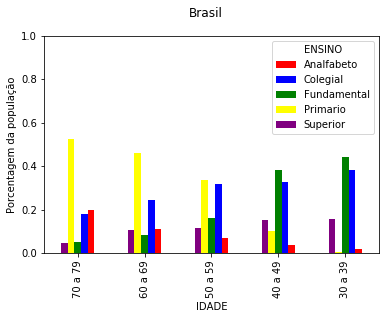

In [10]:
plot=pd.crosstab(df.IDADE,df.ENSINO).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Brasil')

pd.crosstab(df.IDADE,df.ENSINO).apply(lambda r: r/r.sum(), axis=1)

Esse gráfico apresenta os dados gerais do Brasil. Os resultados parecem promissores, mostrando aumento significante nos níveis de ensino fundamental (de 5% para 44%), colegial (de 18% para 38%) e superior (de 4% para 15%). Para compensar esses aumentos, os níveis analfabeto e primário diminuíram de 19% para 1% e de 52% para menos de 1%, respectivamente.

Contudo, esses dados não necessariamente representam todo o Brasil. Alguma região pode ter influenciado significativamente esse gráfico, dando o parecer que todo o Brasil teve melhora significante.

A seguir, farei o mesmo gráfico para cada região do país e analisarei novamente os resultados.


Text(0.5,0.98,'Análise da Região Sul')

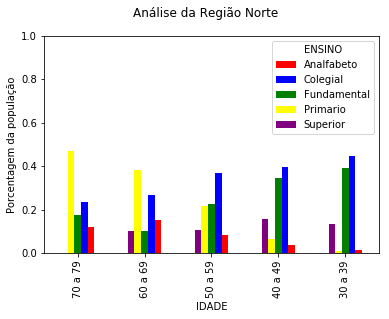

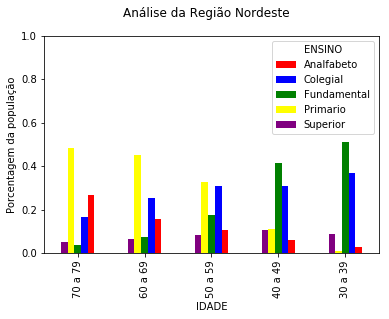

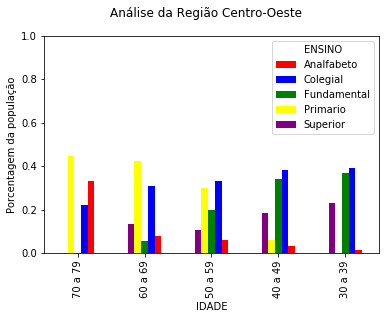

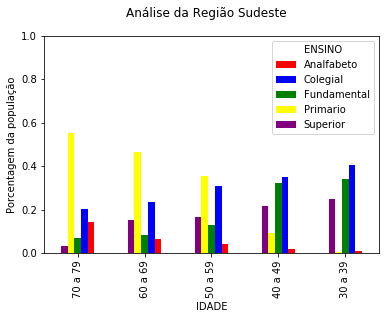

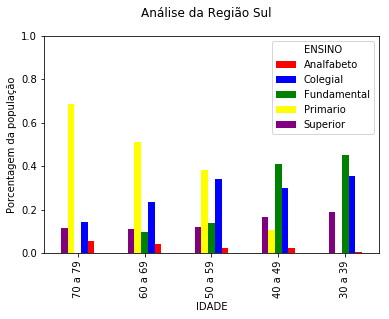

In [7]:
plot=pd.crosstab(dfn.IDADE,dfn.ENSINO).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Norte')

pd.crosstab(dfne.IDADE,dfne.ENSINO).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Nordeste')

pd.crosstab(dfco.IDADE,dfco.ENSINO).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Centro-Oeste')

pd.crosstab(dfse.IDADE,dfse.ENSINO).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Sudeste')

pd.crosstab(dfs.IDADE,dfs.ENSINO).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Sul')

Analisando esses gráficos, é notável que em todos os casos as faixas vermelha e amarela (representando o analfabetismo e ensino primário) decrescem com o tempo, enquanto as faixas verde, azul e roxa (fundamental, colegial e superior) crescem. Além disso, nas regiões Centro-Oeste, Sudeste e Sul o nível superior ultrapassou os 20%.

Isso mostra que a escolaridade média no país melhorou muito. Isso está refletido tanto no gráfico geral do Brasil, quanto nos gráficos de cada região, indicando que esse resultado foi regular em todo o país.

Agora, vou analisar as rendas médias de cada região para determinar se essa variável tem um impacto relevante na evolução do nível médio de ensino. Em cada caso, farei um histograma da renda, para que a análise seja facilitada.


(0, 0.002)

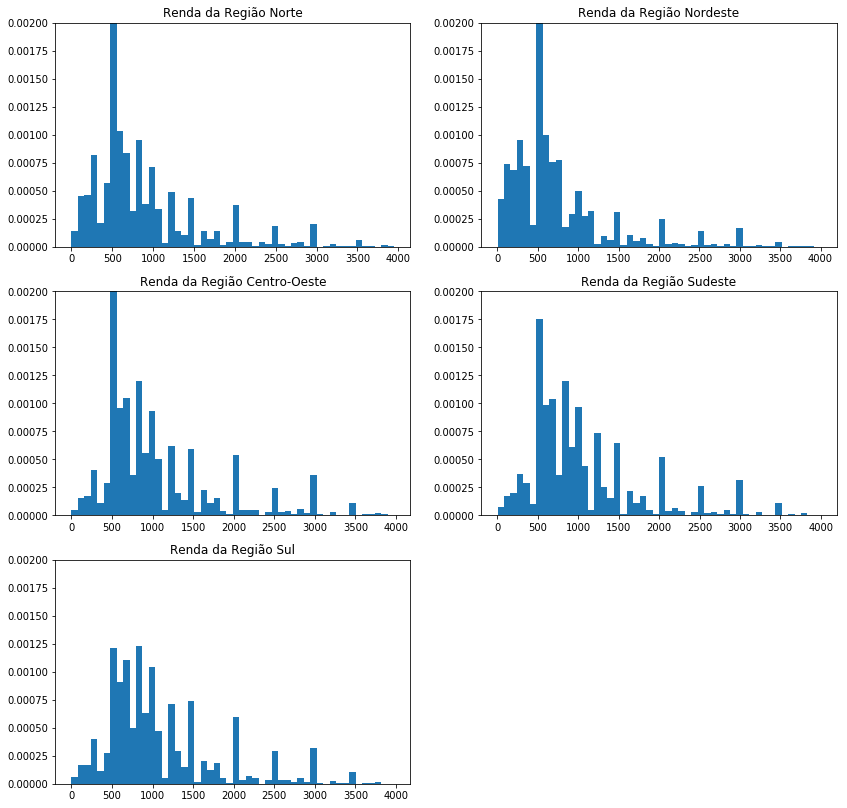

In [8]:
fig = plt.figure(figsize=(14,14))
plt.subplot(321)
plt.hist(pnad.V9532[(pnad.V9532 < 4000) & (pnad.UF > 10) & (pnad.UF < 20)],normed=1,bins=50)
plt.title("Renda da Região Norte")
plt.ylim(0,0.002)

plt.subplot(322)
plt.hist(pnad.V9532[(pnad.V9532 < 4000) & (pnad.UF > 20) & (pnad.UF < 30)],normed=1,bins=50)
plt.title("Renda da Região Nordeste")
plt.ylim(0,0.002)

plt.subplot(323)
plt.hist(pnad.V9532[(pnad.V9532 < 4000) & (pnad.UF > 50) & (pnad.UF < 60)],normed=1,bins=50)
plt.title("Renda da Região Centro-Oeste")
plt.ylim(0,0.002)

plt.subplot(324)
plt.hist(pnad.V9532[(pnad.V9532 < 4000) & (pnad.UF > 30) & (pnad.UF < 40)],normed=1,bins=50)
plt.title("Renda da Região Sudeste")
plt.ylim(0,0.002)

plt.subplot(325)
plt.hist(pnad.V9532[(pnad.V9532 < 4000) & (pnad.UF > 40) & (pnad.UF < 50)],normed=1,bins=50)
plt.title("Renda da Região Sul")
plt.ylim(0,0.002)

Analisando os histogramas, todos apresentam picos em regiões muito específicas. Por exemplo, o pico no valor de R$500,00 é o maior em todos os gráficos, exceto no sul. Esses representam salários mínimos, o que explica o motivo de tantas pessoas obterem a mesma quantia mensalmente, independente da região.

Independente da região, a renda média está sempre entre 500 e 1000 reais, e todos os histogramas são assimétrico à direita. Isso mostra como a maior parte dos brasileiros ganha pouco dinheiro mensalmente, mas há uma pequena porcentagem que ganha muito mais, o que altera o valor médio.

## Conclusão

O melhor exemplo da evolução escolar seria o ensino superior, cuja taxa é de 4% para pessoas de 70 a 79 anos, e sobe para 15% quando se trata dos indivíduos de 30 a 39 anos, aumento de quase 300%. O nível de ensino colegial também demonstra um aumento de 110%, indo de 18% para 38% em 50 anos.

Como no geral os gráficos de barras são parecidos entre si, e os histogramas compartilham essa semelhança, é difícil dizer se a variável renda realmente é de grande importância para a evolução do nível médio de ensino.

Portanto, é claramente visível uma grande melhora no ensino, que era o objetivo principal deste projeto. Contudo, não é possível avaliar se há uma relação entre renda e ensino.
